In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Create Sudoku puzzle
puzzle = np.asarray(
    [
    [0, 0, 0, 3, 1, 6, 0, 5, 9],
    [0, 0, 6, 0, 0, 0, 8, 0, 7],
    [0, 0, 0, 0, 0, 0, 2, 0, 0],
    [0, 5, 0, 0, 3, 0, 0, 9, 0],
    [7, 9, 0, 6, 0, 2, 0, 1, 8],
    [0, 1, 0, 0, 8, 0, 0, 4, 0],
    [0, 0, 8, 0, 0, 0, 0, 0, 0],
    [3, 0, 9, 0, 0, 0, 6, 0, 0],
    [5, 6, 0, 8, 4, 7, 0, 0, 0],
    ]
)

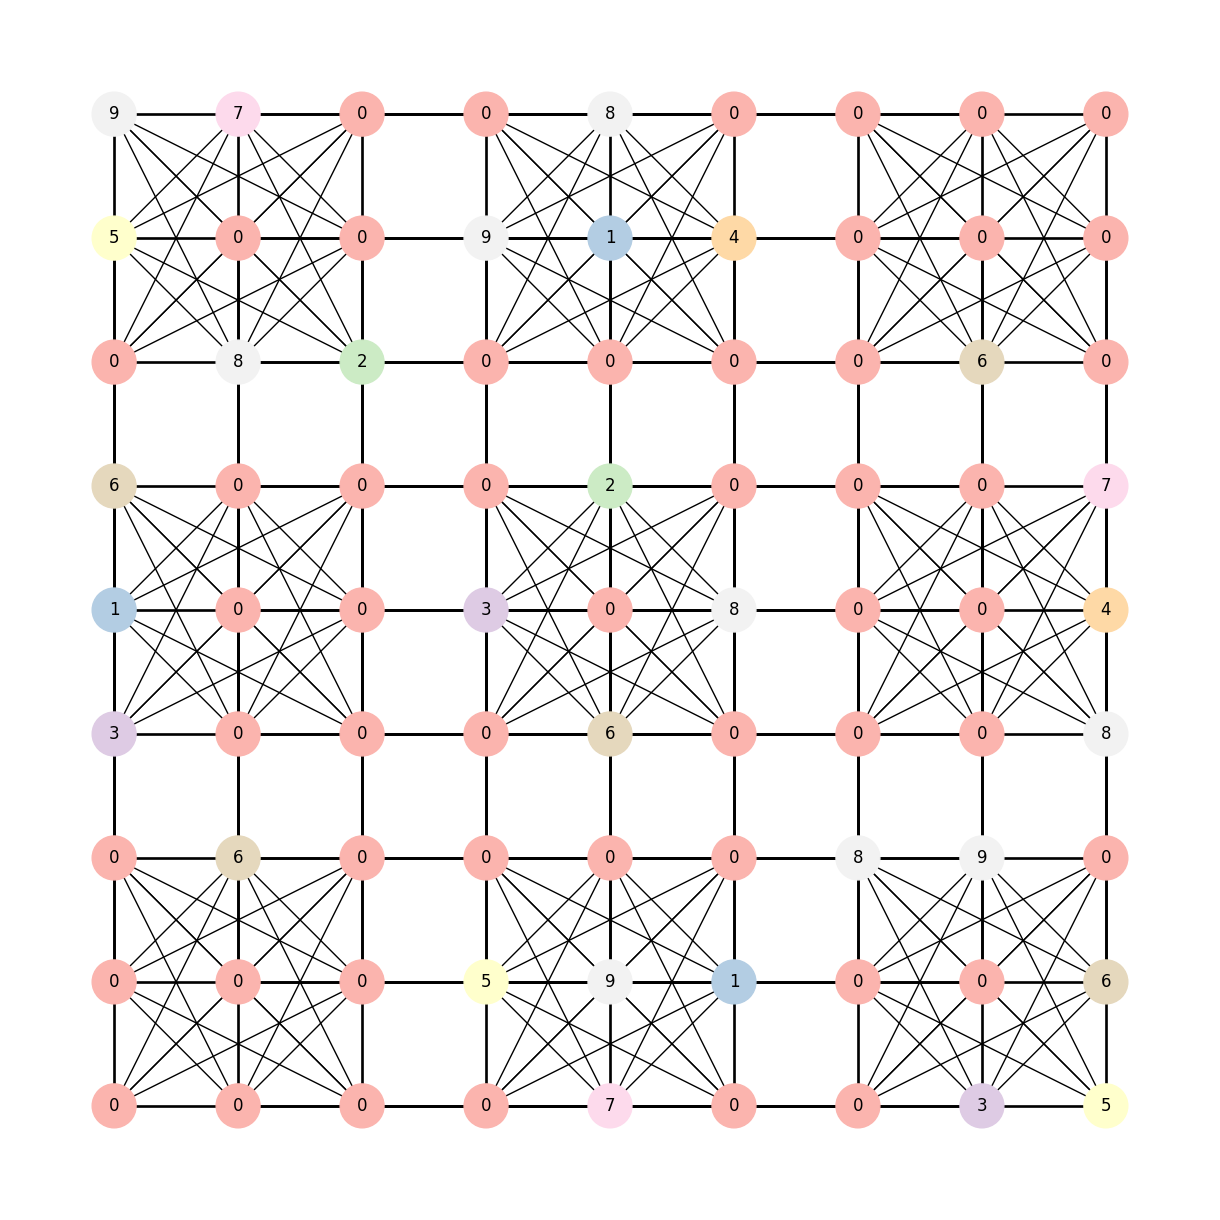

In [3]:
n = 3
G = nx.sudoku_graph(n)
mapping = dict(zip(G.nodes(), puzzle.flatten()))
pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

# we map the nodes 1-9 to a colormap
low, *_, high = sorted(mapping.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

# draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    labels=mapping,
    pos=pos,
    with_labels=True,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    width=1,
    node_size=1000,
)
plt.show()


In [4]:
def is_safe(board, row, col, num):
    # Check if num is not in the current row
    for x in range(9):
        if board[row][x] == num:
            return False

    # Check if num is not in the current column
    for x in range(9):
        if board[x][col] == num:
            return False

    # Check if num is not in the current 3x3 sub-grid
    startRow = row - row % 3
    startCol = col - col % 3
    for i in range(3):
        for j in range(3):
            if board[i + startRow][j + startCol] == num:
                return False

    return True

def solve_sudoku(board):
    empty = find_empty_location(board)
    if not empty:
        return True  # Solved

    row, col = empty

    for num in range(1, 10):
        if is_safe(board, row, col, num):
            board[row][col] = num
            if solve_sudoku(board):
                return True
            board[row][col] = 0  # Backtrack

    return False

def find_empty_location(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return (i, j)
    return None

def print_board(board):
    for row in board:
        print(" ".join(str(num) if num != 0 else "." for num in row))

# Initial Sudoku board
sudoku_board = [
    [0, 0, 0, 3, 1, 6, 0, 5, 9],
    [0, 0, 6, 0, 0, 0, 8, 0, 7],
    [0, 0, 0, 0, 0, 0, 2, 0, 0],
    [0, 5, 0, 0, 3, 0, 0, 9, 0],
    [7, 9, 0, 6, 0, 2, 0, 1, 8],
    [0, 1, 0, 0, 8, 0, 0, 4, 0],
    [0, 0, 8, 0, 0, 0, 0, 0, 0],
    [3, 0, 9, 0, 0, 0, 6, 0, 0],
    [5, 6, 0, 8, 4, 7, 0, 0, 0],
]

print("Initial Sudoku board:")
print_board(sudoku_board)

if solve_sudoku(sudoku_board):
    print("\nSudoku solved successfully:")
    print_board(sudoku_board)
else:
    print("\nNo solution exists")


Initial Sudoku board:
. . . 3 1 6 . 5 9
. . 6 . . . 8 . 7
. . . . . . 2 . .
. 5 . . 3 . . 9 .
7 9 . 6 . 2 . 1 8
. 1 . . 8 . . 4 .
. . 8 . . . . . .
3 . 9 . . . 6 . .
5 6 . 8 4 7 . . .

Sudoku solved successfully:
2 8 7 3 1 6 4 5 9
1 4 6 2 9 5 8 3 7
9 3 5 4 7 8 2 6 1
8 5 2 1 3 4 7 9 6
7 9 4 6 5 2 3 1 8
6 1 3 7 8 9 5 4 2
4 2 8 9 6 3 1 7 5
3 7 9 5 2 1 6 8 4
5 6 1 8 4 7 9 2 3


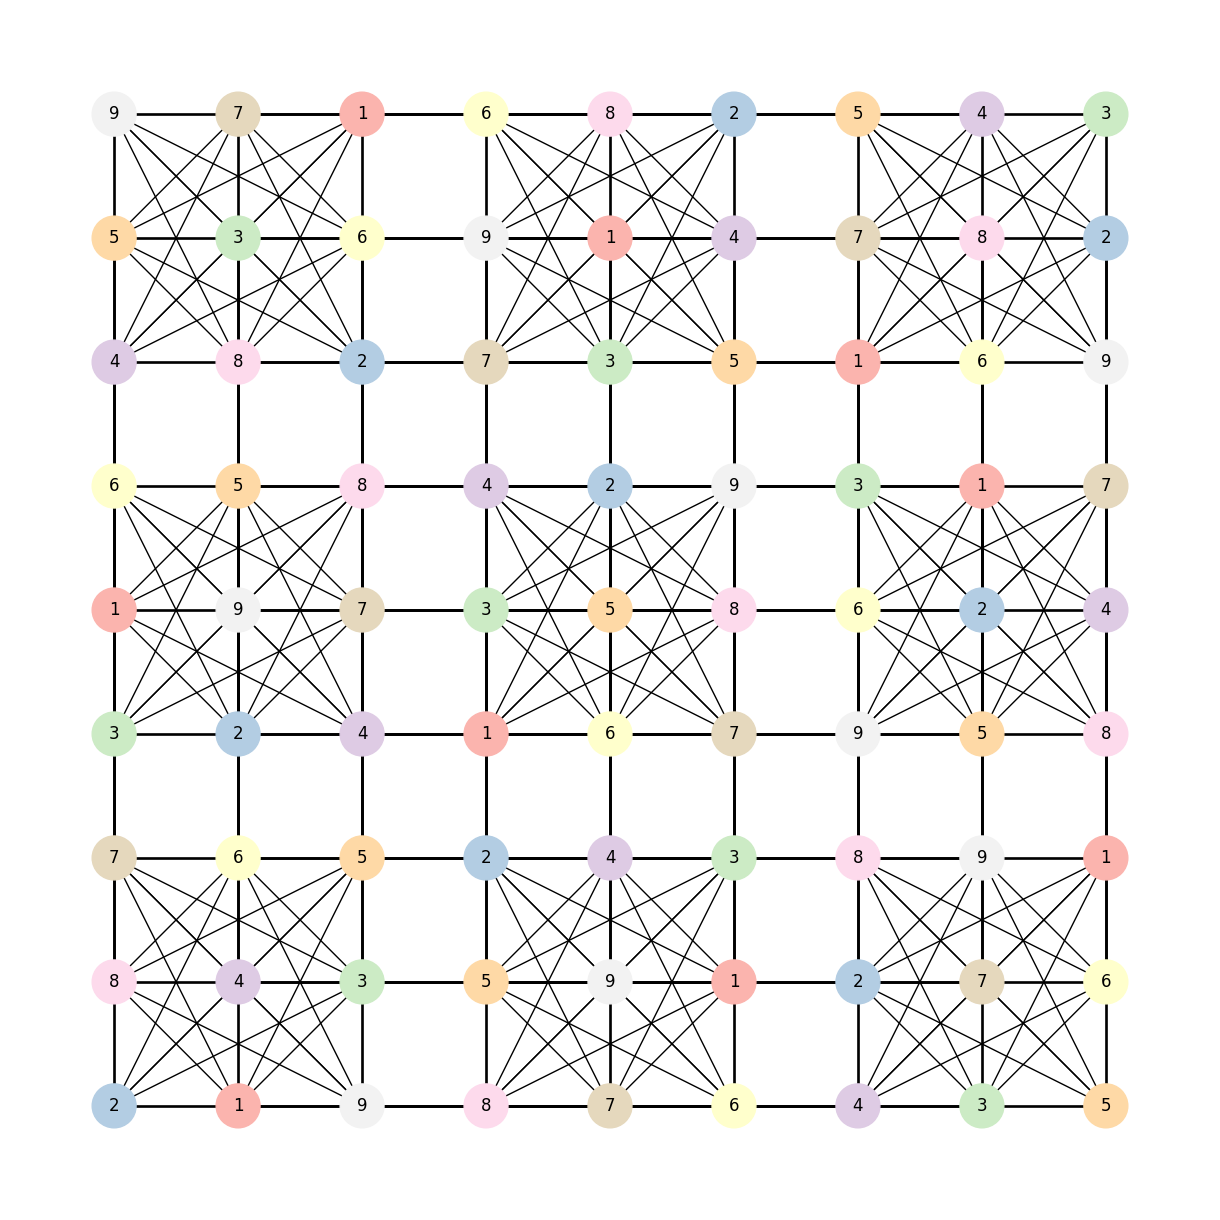

In [5]:

# Sudoku puzzle to solve
puzzle = np.array([
    [2, 8, 7, 3, 1, 6, 4, 5, 9],
    [1, 4, 6, 2, 9, 5, 8, 3, 7],
    [9, 3, 5, 4, 7, 8, 2, 6, 1],
    [8, 5, 2, 1, 3, 4, 7, 9, 6],
    [7, 9, 4, 6, 5, 2, 3, 1, 8],
    [6, 1, 3, 7, 8, 9, 5, 4, 2],
    [4, 2, 8, 9, 6, 3, 1, 7, 5],
    [3, 7, 9, 5, 2, 1, 6, 8, 4],
    [5, 6, 1, 8, 4, 7, 9, 2, 3]
])

n = 3
G = nx.sudoku_graph(n)
mapping = dict(zip(G.nodes(), puzzle.flatten()))
pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

# we map the nodes 1-9 to a colormap
low, *_, high = sorted(mapping.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

# draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    labels=mapping,
    pos=pos,
    with_labels=True,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    width=1,
    node_size=1000,
)
plt.show()



In [6]:
import pygame
import sys

# Sudoku Solver using Graph Coloring
class SudokuSolverGraphColoring:
    def __init__(self, board):
        self.board = board
        self.size = 9
        self.subgrid_size = 3
        self.graph = self.build_graph()

    def build_graph(self):
        graph = {}
        for r in range(self.size):
            for c in range(self.size):
                if self.board[r][c] == 0:
                    graph[(r, c)] = self.get_adjacent_nodes(r, c)
        return graph

    def get_adjacent_nodes(self, row, col):
        adjacent = set()

        # Row and column
        for i in range(self.size):
            if i != col:
                adjacent.add((row, i))
            if i != row:
                adjacent.add((i, col))

        # Subgrid
        start_row = (row // self.subgrid_size) * self.subgrid_size
        start_col = (col // self.subgrid_size) * self.subgrid_size
        for i in range(start_row, start_row + self.subgrid_size):
            for j in range(start_col, start_col + self.subgrid_size):
                if i != row or j != col:
                    adjacent.add((i, j))

        return adjacent

    def is_valid(self, node, color):
        row, col = node
        if node not in self.graph:
            return True
        for adj in self.graph[node]:
            adj_row, adj_col = adj
            if self.board[adj_row][adj_col] == color:
                return False
        return True

    def color_graph(self, node_index=0):
        nodes = list(self.graph.keys())
        if node_index == len(nodes):
            return True
        
        node = nodes[node_index]
        for color in range(1, 10):
            if self.is_valid(node, color):
                row, col = node
                self.board[row][col] = color
                if self.color_graph(node_index + 1):
                    return True
                self.board[row][col] = 0
        
        return False

    def solve_sudoku(self):
        return self.color_graph()

    def validate_board(self):
        for r in range(self.size):
            for c in range(self.size):
                if self.board[r][c] != 0:
                    if not self.is_valid((r, c), self.board[r][c]):
                        return False
        return True

# Sudoku Game GUI using Pygame
class SudokuGame:
    def __init__(self, board):
        self.board = board
        self.solver = SudokuSolverGraphColoring(board)
        self.selected = None
        self.width = 540
        self.height = 540
        self.screen = pygame.display.set_mode((self.width, self.height))
        pygame.display.set_caption("Sudoku")
        self.font = pygame.font.Font(None, 40)
        self.small_font = pygame.font.Font(None, 30)
        self.finished = False

    def draw_grid(self):
        blockSize = self.width // 9
        for x in range(0, self.width, blockSize):
            line_width = 1 if x % (blockSize * 3) != 0 else 3
            pygame.draw.line(self.screen, (0, 0, 0), (x, 0), (x, self.height), line_width)
            pygame.draw.line(self.screen, (0, 0, 0), (0, x), (self.width, x), line_width)

    def draw_numbers(self):
        for i in range(9):
            for j in range(9):
                if self.board[i][j] != 0:
                    text = self.font.render(str(self.board[i][j]), True, (0, 0, 0))
                    self.screen.blit(text, (j * 60 + 20, i * 60 + 10))

    def draw_selected(self):
        if self.selected:
            pygame.draw.rect(self.screen, (255, 0, 0), (self.selected[1] * 60, self.selected[0] * 60, 60, 60), 3)

    def draw_errors(self):
        for i in range(9):
            for j in range(9):
                if self.board[i][j] != 0 and not self.solver.is_valid((i, j), self.board[i][j]):
                    pygame.draw.rect(self.screen, (255, 0, 0), (j * 60, i * 60, 60, 60), 3)

    def handle_key(self, key):
        if self.selected:
            row, col = self.selected
            if key == pygame.K_0 or key == pygame.K_DELETE:
                self.board[row][col] = 0
            elif pygame.K_1 <= key <= pygame.K_9:
                self.board[row][col] = key - pygame.K_0

    def handle_mouse(self, pos):
        x, y = pos
        self.selected = (y // 60, x // 60)

    def check_completion(self):
        for row in self.board:
            if 0 in row:
                return False
        return self.solver.validate_board()

    def draw(self):
        self.screen.fill((255, 255, 255))
        self.draw_grid()
        self.draw_numbers()
        self.draw_selected()
        self.draw_errors()
        if self.finished:
            text = self.font.render("Well Played!", True, (0, 255, 0))
            self.screen.blit(text, (self.width // 2 - text.get_width() // 2, self.height // 2 - text.get_height() // 2))
        pygame.display.flip()

    def main(self):
        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    sys.exit()
                if event.type == pygame.MOUSEBUTTONDOWN:
                    self.handle_mouse(pygame.mouse.get_pos())
                if event.type == pygame.KEYDOWN:
                    self.handle_key(event.key)

            if self.check_completion():
                self.finished = True

            self.draw()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
if __name__ == "__main__":
    initial_board = [
     [0, 0, 0, 3, 1, 6, 0, 5, 9],
     [0, 0, 6, 0, 0, 0, 8, 0, 7],
     [0, 0, 0, 0, 0, 0, 2, 0, 0],
     [0, 5, 0, 0, 3, 0, 0, 9, 0],
     [7, 9, 0, 6, 0, 2, 0, 1, 8],
     [0, 1, 0, 0, 8, 0, 0, 4, 0],
     [0, 0, 8, 0, 0, 0, 0, 0, 0],
     [3, 0, 9, 0, 0, 0, 6, 0, 0],
     [5, 6, 0, 8, 4, 7, 0, 0, 0],
    ]

    pygame.init()
    game = SudokuGame(initial_board)
    game.main()

SystemExit: 

C:\Users\susmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
